In [ ]:
# The topic of this project is to look at the merger of MW and M31 and see what the bulge density is

# The questions I'm trying to answer is if the remnant bulge can be fit by a Sersic profile and if it
# accurately predicts an elliptical galaxy result

# The first thing my code does is fin the mass profiles of each galaxy before the merger, then calculate
# the bulge mass.  Next I find the surface brightness profile, and graph the results.  I then use code from
# HW 6 to figure out when the merger happens and use a snaphot long after it occurs, and repeat the same
# process I used from before the merger.  Finally, I combine the results from after and get the remnant
# profiles.

In [1]:
# Import Modules 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import astropy.units as u

# Import Gravitational constant
from astropy.constants import G

# Import from previous HWs
from ReadFile import Read
from MassProfile import MassProfile
from CenterOfMass import CenterOfMass
from CenterOfMass2 import CenterOfMass
from GalaxyMass import ComponentMass

# Modified MassProfile for this project
# from MassProfile2 import MassProfile

Testing MW at 30 kpc
********************
Scale Radius = 61
Enclosed mass is 21.0 solMass x 1e10
Hernquist = 21.46 solMass x 1e10
 
Velocity = 173.78 km kpc / s
Hernquist Vc = 175.42 km kpc / s
 
Testing M31 at 30 kpc
********************
Scale Radius = 62
Enclosed mass is 21.0 solMass x 1e10
Hernquist = 20.43 solMass x 1e10
 
Velocity = 171.39 km kpc / s
Hernquist Vc = 171.13 km kpc / s
 
Testing M33 at 30 kpc
********************
Scale Radius = 25
Enclosed mass is 6.0 solMass x 1e10
Hernquist = 5.56 solMass x 1e10
 
Velocity = 89.53 km kpc / s
Hernquist Vc = 89.31 km kpc / s
 


In [2]:
# Function that returns the Sersic Profile for an elliptical system (Re)
def SersicE(R, Re, n, Mtot):
    """Inputs:
         R = array of radii (kpc)
         Re = half light radius (kpc)
         n = the Sersic index
         Mtot = total stellar mass (Msun)
    Return:
         Surface brightness profile in Lsun/kpc^2"""
    
    # Assuming M/L = 1
    L = Mtot # total luminosity = total stellar mass
    
    # Ie= L/(7.2*pi*Re^2)
    Ie = L/7.2/np.pi/Re**2
    
    # exponent
    A = (R/Re)**(1/n) - 1
    
    return Ie*np.exp(-7.6*A)

In [3]:
# Creates instance of MassProfile for both MW and M31 and stores them as variables (BEFORE MERGER)
MW = MassProfile("MW",0)
M31 = MassProfile("M31",0)

In [4]:
# Creates array of radii from 0.1 kpc to 30 kpc in increments of 0.1 kpc
R = np.arange(0.1, 30, 0.1)

In [5]:
# Define new arrays for BulgeMass, that uses the function MassEnclosed within MassProfile to compute the 
# mass profile of the bulge of each galaxy
MWBulgeMass = MW.MassEnclosed(3,R) # particle type 3 = bulge
M31BulgeMass = M31.MassEnclosed(3,R)

In [6]:
# Testing Bulge Mass at radius of 10 kpc for MW (BEFORE MERGER)
MWBulgeMass[10]

<Quantity 4.30215e+09 solMass>

In [7]:
# Testing Bulge Mass at radius of 10 kpc for M31 (BEFORE MERGER)
M31BulgeMass[10]

<Quantity 4.43864301e+09 solMass>

In [8]:
# Computes surface mass density profile for simulated bulges for each galaxy
# Assumes M/L ~ 1 means this is also the surface brightness profile in Lsun/kpc
MWBulgeI = MWBulgeMass/4/np.pi/R**2
M31BulgeI = M31BulgeMass/4/np.pi/R**2

In [9]:
# Computes half mass radius, Re, for MW
MWBulgeTotal = np.max(MWBulgeMass) # Total mass of the bulge
MWBulgeTotal

<Quantity 9.6138045e+09 solMass>

In [10]:
Low = MWBulgeTotal/2
High = MWBulgeTotal/2 + MWBulgeTotal/2*0.01

index = np.where( (MWBulgeMass > Low) & (MWBulgeMass < High))

Re = R[index]

MWBulgeTotal/2

<Quantity 4.80690225e+09 solMass>

In [11]:
# Computes half mass radius, Re, for M31
M31BulgeTotal = np.max(M31BulgeMass) # Total mass of the bulge
M31BulgeTotal

<Quantity 1.7838793e+10 solMass>

In [12]:
Low = M31BulgeTotal/2
High = M31BulgeTotal/2 + M31BulgeTotal/2*0.01

index = np.where( (M31BulgeMass > Low) & (M31BulgeMass < High))

Re = R[index]

M31BulgeTotal/2

<Quantity 8.91939648e+09 solMass>

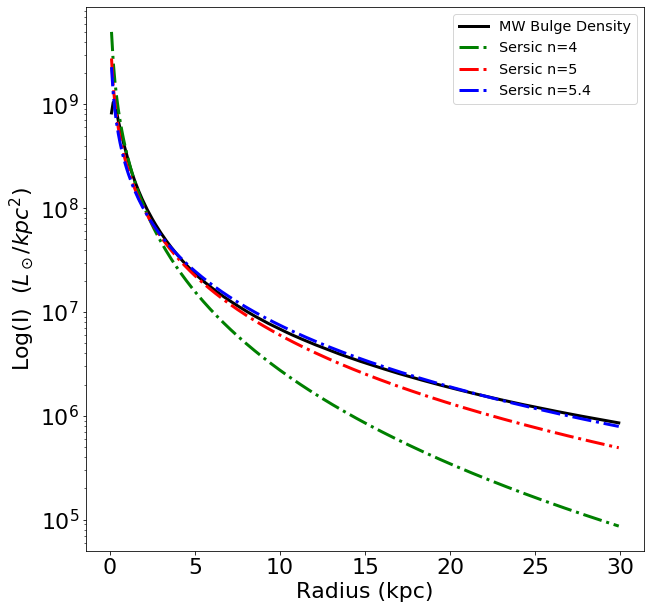

In [13]:
# Plot the MW Bulge density profile vs 
# the Sersic profile
# (BEFORE MERGER)
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the MW bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,MWBulgeI, color='black',linewidth=3, label='MW Bulge Density')


# Sersic fit to the surface brightness Sersic fit
plt.semilogy(R,SersicE(R, Re, 4, MWBulgeTotal), color='green', linewidth=3, linestyle='-.', label='Sersic n=4')
plt.semilogy(R,SersicE(R, Re, 5, MWBulgeTotal), color='red', linewidth=3, linestyle='-.', label='Sersic n=5')
plt.semilogy(R,SersicE(R, Re, 5.4, MWBulgeTotal), color='blue', linewidth=3, linestyle='-.', label='Sersic n=5.4')


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  ($L_\odot/kpc^2$)', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# save 
fig.savefig('MWBulgeDensityBefore.pdf')

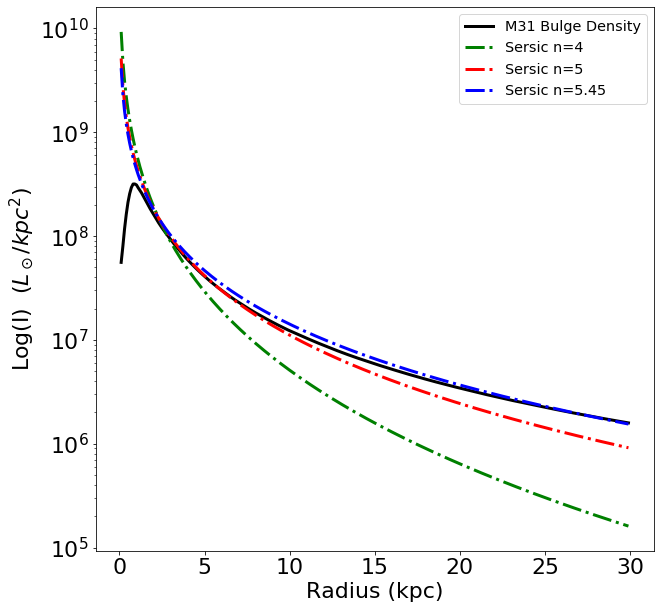

In [14]:
# Plot the M31 Bulge density profile vs 
# the Sersic profile
# (BEFORE MERGER)
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the M31 bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,M31BulgeI, color='black',linewidth=3, label='M31 Bulge Density')


# Sersic fit to the surface brightness Sersic fit 
plt.semilogy(R,SersicE(R, Re, 4, M31BulgeTotal), color='green', linewidth=3, linestyle='-.', label='Sersic n=4')
plt.semilogy(R,SersicE(R, Re, 5, M31BulgeTotal), color='red', linewidth=3, linestyle='-.', label='Sersic n=5')
plt.semilogy(R,SersicE(R, Re, 5.45, M31BulgeTotal), color='blue', linewidth=3, linestyle='-.', label='Sersic n=5.45')


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  ($L_\odot/kpc^2$)', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# save 
fig.savefig('M31BulgeDensityBefore.pdf')

In [15]:
# Function that computes the time and COM position and velocity vectors of a given galaxy in each snapshot and saves the out put in a file
# inputs:
        #galaxy = name of galaxy
        # start = # of the first snapshot to be read in
        # end = # of the last snapshot to be read in
        # n = integer indicating intervals over which we will return the COM
# return:
        # Orbit time, velocity, and position
def OrbitCOM(galaxy, start, end, n):
        # compose the filename for output
    fileout = "Orbit_" + galaxy + ".txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    if (galaxy == 'MW'or galaxy == 'M31'):
        delta = 0.1
        VolDec = 2
    # for M33 that is stripped more, use different values for VolDec
    else:
        delta = 0.1
        VolDec = 4

    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start,end+1,n)
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([snap_ids.size,7])
    
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids):  # loop over files
        
        # compose the data filename (be careful about the folder)
        # add a string of the filenumber to the value "000"
        ilbl = '000' + str(snap_id)
        # remove all but the last 3 digits
        ilbl = ilbl[-3:]
        # create filenames
        filename='VLowRes/%s_'%(galaxy) + ilbl + '.txt'
        
        # Initialize an instance of CenterOfMass class, using disk particles
        galaxy_COM = CenterOfMass(filename, 2)
        
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        galaxy_COM_P = galaxy_COM.COM_P(delta, VolDec)
        galaxy_COM_V = galaxy_COM.COM_V(galaxy_COM_P[0],galaxy_COM_P[1],galaxy_COM_P[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value)
        orbit[i] = (galaxy_COM.time.value)/1000, galaxy_COM_P[0].value, galaxy_COM_P[1].value, galaxy_COM_P[2].value, galaxy_COM_V[0].value, galaxy_COM_V[1].value, galaxy_COM_V[2].value
        # time is divided by 1000 to ensure units of (Gyr)
        
        # note that you can store 
        # a[i] = var1, *tuple(array1) 
        
        # print snap_id to see the progress
        print(snap_id)
        #print(orbit)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [16]:
# Test to recover COM data files
print("Starting to compute MW orbit")
OrbitCOM("MW",0,800,10)
print("Starting to compute M31 orbit")
OrbitCOM("M31",0,800,10)
print("Starting to compute M33 orbit")
OrbitCOM("M33",0,800,10)

Starting to compute MW orbit
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
Starting to compute M31 orbit
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
Starting to compute M33 orbit
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730


In [17]:
# Reads in data files for orbits of the above code for each galaxy
MWOrbData = np.genfromtxt("Orbit_MW.txt",dtype=None,names=True)
M31OrbData = np.genfromtxt("Orbit_M31.txt",dtype=None,names=True)
M33OrbData = np.genfromtxt("Orbit_M33.txt",dtype=None,names=True)

In [18]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def relative_mag(orbit1, orbit2): 
    # Input: 3D vector 1 , 3D vector 2
    # returns the magnitude of the relative position and velocities
    pos =  np.sqrt( (orbit1['x']-orbit2['x'])**2 + (orbit1['y']-orbit2['y'])**2 + (orbit1['z']-orbit2['z'])**2)
    vel =  np.sqrt( (orbit1['vx']-orbit2['vx'])**2 + (orbit1['vy']-orbit2['vy'])**2 + (orbit1['vz']-orbit2['vz'])**2)
    return pos,vel

In [19]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
M31_MW_R, M31_MW_V = relative_mag(MWOrbData, M31OrbData)

# of M33 and M31
M33_M31_R, M33_M31_V = relative_mag(M31OrbData, M33OrbData)

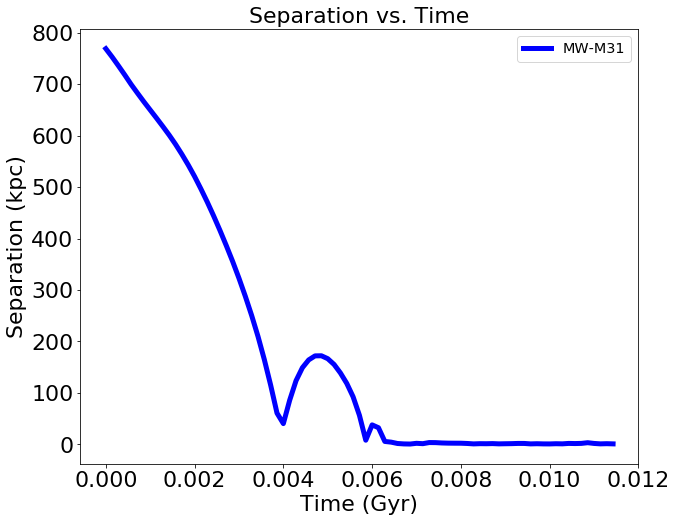

In [20]:
# Plot the Orbit of the galaxies 
#################################

fig, ax= plt.subplots(figsize=(10, 8))

# Plot the separtion of M31 and MW
ax.plot(MWOrbData['t']/1e3, M31_MW_R, color='blue', linewidth=5, label='MW-M31')

# Plot the separtion of M33 and M31
# ax.plot(M31OrbData['t']/1e3, M33_M31_R, color='red', linewidth=5, label='M31-M33')

# Add axis labels
plt.xlabel('Time (Gyr)', fontsize=22)
plt.ylabel('Separation (kpc)', fontsize=22)

# Set the title
ax.set_title("Separation vs. Time", fontsize=22)

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# save 
# fig.savefig('orbit_sep.pdf')

In [21]:
# According to the graph above, MW and M31 will merge in about 6 Gyr.
# This means I will use the corresponding snapshot, snapshot 4 of HighRes file, to find the Sersic profile 
# of the merger.

np.concatenate([MW.x,M31.x]).value
np.concatenate([MW.y,M31.y]).value
np.concatenate([MW.z,M31.z]).value

array([  52.8528,  391.692 ,  -83.9565, ..., -284.801 , -283.027 ,
       -274.907 ])

In [22]:
# Creates instance of MassProfile for both MW and M31 and stores them as variables (AFTER MERGER)
MW_2 = MassProfile("MW",800)
M31_2 = MassProfile("M31",800)

In [23]:
# Define new arrays for BulgeMass, that uses the function MassEnclosed within MassProfile to compute the 
# mass profile of the bulge of each galaxy (AFTER MERGER)
MWBulgeMass_2 = MW_2.MassEnclosed(3,R) # particle type 3 = bulge
M31BulgeMass_2 = M31_2.MassEnclosed(3,R)

In [24]:
# Testing Bulge Mass at radius of 10 kpc for MW (AFTER MERGER)
MWBulgeMass_2[10]

<Quantity 2.117058e+09 solMass>

In [25]:
# Testing Bulge Mass at radius of 10 kpc for M31 (AFTER MERGER)
M31BulgeMass_2[10]

<Quantity 8.1914871e+08 solMass>

In [26]:
# Computes surface mass density profile for simulated bulges for each galaxy after merger
# Assumes M/L ~ 1 means this is also the surface brightness profile in Lsun/kpc
MWBulgeI_2 = MWBulgeMass_2/4/np.pi/R**2
M31BulgeI_2 = M31BulgeMass_2/4/np.pi/R**2

In [27]:
# Computes half mass radius, Re, for MW after merging
MWBulgeTotal_2 = np.max(MWBulgeMass_2) # Total mass of the bulge
MWBulgeTotal_2

<Quantity 8.8154055e+09 solMass>

In [28]:
Low = MWBulgeTotal_2/2
High = MWBulgeTotal_2/2 + MWBulgeTotal_2/2*0.1

index = np.where( (MWBulgeMass_2 > Low) )#& (MWBulgeMass_2 < High))

Re_bulge = R[index][0]

MWBulgeTotal_2/2

<Quantity 4.40770275e+09 solMass>

In [29]:
# Test to see if Re gives a value and what that value is
Re_bulge

2.6

In [30]:
# Computes half mass radius, Re, for M31 after merging
M31BulgeTotal_2 = np.max(M31BulgeMass_2) # Total mass of the bulge
M31BulgeTotal_2

<Quantity 1.68391708e+10 solMass>

In [31]:
Low = M31BulgeTotal_2/2
High = M31BulgeTotal_2/2 + M31BulgeTotal_2/2*0.1

index = np.where( (M31BulgeMass_2 > Low)) #& (M31BulgeMass_2 < High))

Re_bulge2 = R[index][0]

M31BulgeTotal_2/2

<Quantity 8.41958542e+09 solMass>

In [32]:
# Test to see if Re gives a value and what that value is
Re_bulge2

3.9000000000000004

In [33]:
# Adding the bulge masses to get the combined system of remnant
MTotBulgeMass = MWBulgeMass_2 + M31BulgeMass_2

In [34]:
# Computes surface mass density profile for simulated bulge of the merger
# Assumes M/L ~ 1 means this is also the surface brightness profile in Lsun/kpc
MergerBulgeI = MTotBulgeMass/4/np.pi/R**2

In [35]:
# Computes half mass radius, Re, for merger remnant
MergerBulgeTotal = np.max(MTotBulgeMass) # Total mass of the bulge
MergerBulgeTotal

<Quantity 2.56545763e+10 solMass>

In [36]:
Low = MergerBulgeTotal/2
High = MergerBulgeTotal/2 + MergerBulgeTotal/2*0.1

index = np.where( (MTotBulgeMass > Low) )#& (MWBulgeMass_2 < High))

Re_bulge3 = R[index][0]

MergerBulgeTotal/2

<Quantity 1.28272882e+10 solMass>

In [37]:
# Test to see if Re gives a value and what that value is
Re_bulge3

3.5000000000000004

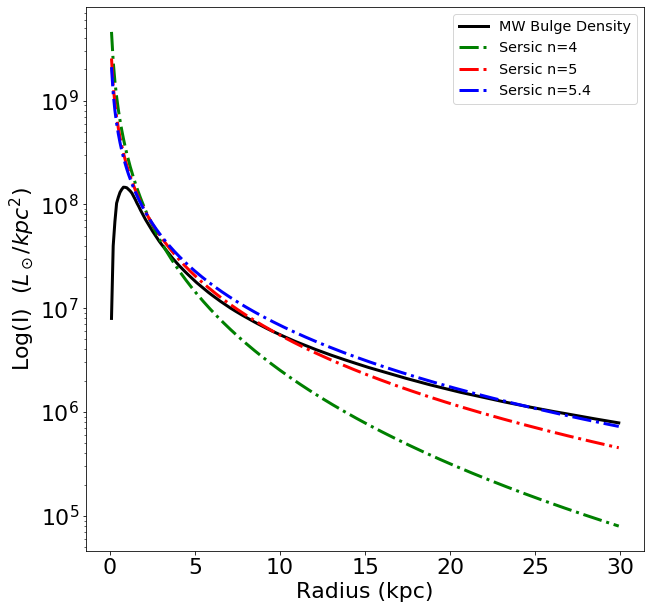

In [38]:
# Plot the MW Bulge density profile vs 
# the Sersic profile
# (AFTER MERGER)
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the MW bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,MWBulgeI_2, color='black',linewidth=3, label='MW Bulge Density')


# Sersic fit to the surface brightness Sersic fit
plt.semilogy(R,SersicE(R, Re, 4, MWBulgeTotal_2), color='green', linewidth=3, linestyle='-.', label='Sersic n=4')
plt.semilogy(R,SersicE(R, Re, 5, MWBulgeTotal_2), color='red', linewidth=3, linestyle='-.', label='Sersic n=5')
plt.semilogy(R,SersicE(R, Re, 5.4, MWBulgeTotal_2), color='blue', linewidth=3, linestyle='-.', label='Sersic n=5.4')


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  ($L_\odot/kpc^2$)', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# save 
fig.savefig('MWBulgeDensityAfter.pdf')

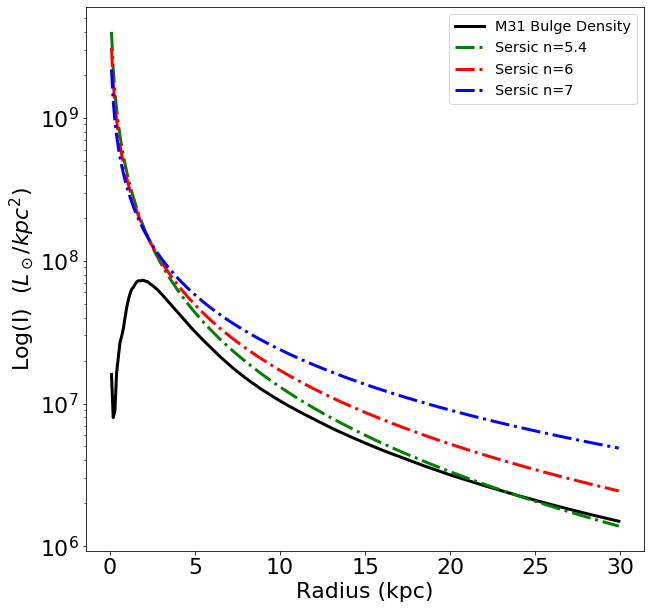

In [39]:
# Plot the M31 Bulge density profile vs 
# the Sersic profile
# (AFTER MERGER)
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the M31 bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,M31BulgeI_2, color='black',linewidth=3, label='M31 Bulge Density')


# Sersic fit to the surface brightness Sersic fit 
plt.semilogy(R,SersicE(R, Re, 5.4, M31BulgeTotal_2), color='green', linewidth=3, linestyle='-.', label='Sersic n=5.4')
plt.semilogy(R,SersicE(R, Re, 6, M31BulgeTotal_2), color='red', linewidth=3, linestyle='-.', label='Sersic n=6')
plt.semilogy(R,SersicE(R, Re, 7, M31BulgeTotal_2), color='blue', linewidth=3, linestyle='-.', label='Sersic n=7')


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  ($L_\odot/kpc^2$)', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# save 
fig.savefig('M31BulgeDensityAfter.pdf')

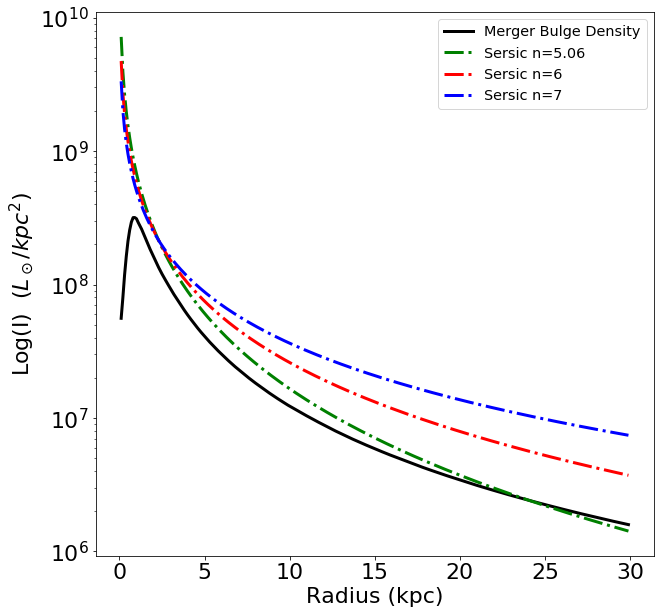

In [40]:
# Plot the MW-M31 Remnant Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the M31 bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,M31BulgeI, color='black',linewidth=3, label='Merger Bulge Density')


# Sersic fit to the surface brightness Sersic fit 
plt.semilogy(R,SersicE(R, Re, 5.06, MergerBulgeTotal), color='green', linewidth=3, linestyle='-.', label='Sersic n=5.06')
plt.semilogy(R,SersicE(R, Re, 6, MergerBulgeTotal), color='red', linewidth=3, linestyle='-.', label='Sersic n=6')
plt.semilogy(R,SersicE(R, Re, 7, MergerBulgeTotal), color='blue', linewidth=3, linestyle='-.', label='Sersic n=7')


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  ($L_\odot/kpc^2$)', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

# save 
fig.savefig('MergerBulgeDensity.pdf')